In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Read Data

In [28]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
print('Train Shape {}, Test Shape{}'.format(train.shape, test.shape))
train.head()

Train Shape (20800, 5), Test Shape(5200, 4)


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


###  Target Value Exploration

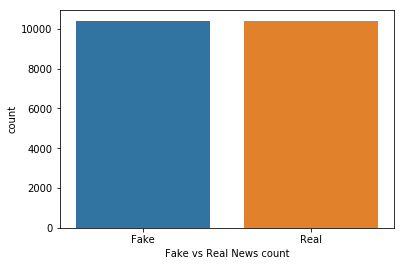

In [4]:
train['label_name'] = train['label'].map({0:'Real', 1:'Fake'})
sns.countplot(train.label_name)
plt.xlabel('Fake vs Real News count')
plt.show()

train.drop('label_name', axis=1, inplace=True)

### Authors

In [5]:
print('Number of Distinct Authors:',train['author'].value_counts().shape[0])

Number of Distinct Authors: 4201


### Sample News Text
Display a Random News text

In [6]:
import random
rand_index = random.randint(0, 20000)
if train.label[rand_index] == 0:
   print('Real News')
else:
  print('Fake News')

print('Author:', train.author[rand_index])
train.text[rand_index]


Real News
Author: James Glanz and Rami Nazzal


'DAHIYAT AL BARID, West Bank  —   At 4:15 a. m. on a   street, a    Palestinian man came running from the shadows between buildings with a rickety wooden ladder. He slapped it against the hulking concrete wall and climbed up, hoisting himself the last six feet because the ladder was too short. The wall, which Israel began building more than a decade ago to thwart the suicide bombers of the second intifada, is supposed to prevent Palestinian residents of the occupied West Bank from entering into Israel outside military checkpoints where their papers can be examined. But the Palestinian man perched in a gap in the concertina wire that tops much of the snaking   route of the wall. He motioned to a white Daewoo sedan that had lurched to a stop below, and one by one, four young men stepped out of the car, climbed the   ladder, and slid down a rope on the other side. Within minutes, another car was speeding the men to construction sites in Israel, where they did not have permits to work, and

## Missing data

In [7]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent= (data.isnull().sum() * 100 / data.isnull().count() ).sort_values(ascending = False)
    df = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
    return df[df['Total'] != 0]

In [8]:
missing_data(train)

,Total,Percent
author,1957,9.408654
title,558,2.682692
text,39,0.187500


### Data Pre-Processing

In [9]:
train = train.fillna('')
test =  test.fillna('')

In [10]:
train['total']=train['title']+' '+train['author']+' '+train['text']
test['total']= test['title']+' '+test['author']+' '+test['text']

In [23]:
train_texts = train.total.tolist()
test_texts = test.total.tolist()
train_labels = train['label'].values
train_list[:3]

['House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It Darrell Lucus House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members 

In [12]:
train_labels[:3]

array([1, 0, 1], dtype=int64)

### Tokenize Raw Data

In [20]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import  pad_sequences

maxlen = 1000 #Text max length in words
max_words = 20000 # Top number of words in sample

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(train_texts)

# Create a numneric array for text array
sequences = tokenizer.texts_to_sequences(train_texts)

#Mapping of all words to number 
word_index = tokenizer.word_index
print('Found %s unique token' % len(word_index))

train_data = np.array(sequences)
print('Train Data Shape', train_data.shape)

print('Display first three texts converted to numbers')
train_data[:3]

Found 242482 unique token
Train Data Shape (20800,)
Display first three texts converted to numbers


array([list([129, 5167, 2271, 42, 371, 85, 151, 2682, 792, 332, 2526, 7401, 2972, 14, 11929, 129, 5167, 2271, 42, 371, 85, 151, 2682, 792, 332, 2526, 7401, 2972, 14, 18, 11929, 10, 370, 519, 142, 3497, 2526, 7401, 10, 1, 12029, 6, 95, 15500, 4190, 1109, 4744, 620, 986, 175, 5, 2726, 6210, 18, 2752, 12, 11822, 2, 5860, 60, 8, 65, 1490, 33, 1, 1537, 427, 6, 1, 108, 8, 26, 311, 694, 607, 30, 164, 2, 5, 129, 275, 2271, 14, 1359, 63, 42, 66, 133, 33, 1, 393, 1537, 427, 8, 15, 159, 14, 2086, 57, 7, 56, 607, 635, 23, 80, 5693, 792, 4152, 7, 1, 291, 13, 648, 73, 376, 7, 119, 22, 952, 2, 110, 394, 265, 1419, 1, 4973, 345, 10, 1, 3267, 5371, 371, 1171, 40, 14, 24, 607, 31, 212, 57, 1118, 5, 2247, 24, 43, 3, 1, 202, 502, 13587, 15, 42, 80, 133, 607, 7480, 1, 202, 13587, 4, 275, 4973, 281, 3, 1, 129, 449, 4112, 4, 4284, 5371, 7, 23, 599, 13, 5757, 376, 14, 37, 518, 1471, 6, 269, 2, 151, 55, 31, 3384, 1641, 263, 25, 184, 64, 26, 792, 384, 57, 4284, 502, 877, 2526, 7401, 344, 1, 148, 108, 12, 26, 22

In [21]:
word_index

{'childreninshadow': 104400,
 'delusionally': 174569,
 'oaths': 18409,
 'inadequate”': 89364,
 'hasidism': 168171,
 'clovers': 199446,
 '“enemies”': 58126,
 'theory’': 53409,
 'talerman’s': 123179,
 'afueras': 197675,
 'poltergeists': 113543,
 'kivas': 207963,
 'midfielder': 61962,
 'ahistorical': 91698,
 "that'll": 123564,
 'birddogging': 230002,
 '“fifa': 87356,
 'shanta': 189475,
 'icasa': 27063,
 'sectário': 170457,
 'guerres': 133287,
 '“ascension”': 121457,
 'warming': 2609,
 'roxy': 45252,
 'fromm': 227739,
 'sproul': 50451,
 'riverkeeper': 98712,
 '“inseparable': 191501,
 'screeches': 83688,
 '–“professional': 207216,
 '“utopia”': 52667,
 'indulged': 25981,
 'anarquía': 237926,
 '3797': 194975,
 'thinking’': 177213,
 'zuckerpandian': 187883,
 'whimpering”': 158285,
 'camina': 68542,
 'unline': 202341,
 'seis': 36519,
 'jizan': 52781,
 'désiste': 206708,
 'benyamina': 66257,
 '‘holy': 43908,
 '735': 54425,
 '“earned”': 124604,
 'geringen': 178462,
 'nanoracks': 225436,
 '”europe

### Tokenize Test Data

In [25]:
sequences = tokenizer.texts_to_sequences(test_texts)
test_data = np.array(sequences)
print('Test Data Shape', test_data.shape)

Test Data Shape (5200,)


### One Hot Encode

In [26]:
def vectorize_sequences(sequences, dimensions = max_words):
#   One hot encode
    results = np.zeros((len(sequences), dimensions))
    for i, sequences in enumerate(sequences):      
        results[i, sequences] = 1
    return results    



In [31]:
X  = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
print('Train Shape {}, Test Shape{}'.format(X.shape, X_test.shape))
pd.DataFrame(X).head()

Train Shape (20800, 20000), Test Shape(5200, 20000)


,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Convert labels to Float array

In [32]:
y = np.asarray(train_labels).astype('float32')
y[:5]

array([1., 0., 1., 1., 1.], dtype=float32)

### Create Training and Validation sets

In [39]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.20,  random_state = 42, stratify = y)
print('Train Size{}, Validation Size {}, Test Size {}'.format(X_train.shape, X_valid.shape, X_test.shape))

Train Size(16640, 20000), Validation Size (4160, 20000), Test Size (5200, 20000)


### Create NN Models

In [46]:
from keras import models, layers
from keras import losses, metrics, optimizers, regularizers

#Create Dense Model
def get_dnn_model():
    model = models.Sequential()
    model.add(layers.Dense(16, activation= 'relu', input_shape = (max_words, )))
    model.add(layers.Dense(16, activation = 'relu'))
    model.add(layers.Dense(1, activation= 'sigmoid'))
    model.compile( optimizer= 'rmsprop',
                   loss = 'binary_crossentropy',
                   metrics = ['acc']
             )
    return model

## Train Dense Nueral Network

In [48]:
model = get_dnn_model()
history = model.fit( X_train,
                     y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (X_valid, y_valid)
                   )

Train on 16640 samples, validate on 4160 samples
Epoch 1/20
16640/16640 [==============================] - 7s 391us/step - loss: 0.4043 - acc: 0.8716 - val_loss: 0.2339 - val_acc: 0.9618
Epoch 2/20
16640/16640 [==============================] - 6s 337us/step - loss: 0.1533 - acc: 0.9825 - val_loss: 0.1258 - val_acc: 0.9760
Epoch 3/20
16640/16640 [==============================] - 6s 338us/step - loss: 0.0716 - acc: 0.9935 - val_loss: 0.0850 - val_acc: 0.9793
Epoch 4/20
16640/16640 [==============================] - 6s 341us/step - loss: 0.0361 - acc: 0.9980 - val_loss: 0.0799 - val_acc: 0.9817
Epoch 5/20
16640/16640 [==============================] - 6s 335us/step - loss: 0.0174 - acc: 0.9994 - val_loss: 0.0741 - val_acc: 0.9822
Epoch 6/20
16640/16640 [==============================] - 6s 331us/step - loss: 0.0083 - acc: 0.9998 - val_loss: 0.0666 - val_acc: 0.9839
Epoch 7/20
16640/16640 [==============================] - 6s 331us/step - loss: 0.0038 - acc: 0.9999 - val_loss: 0.0634 - v

## Plot Training vs Validation Accuracy

In [49]:
def plot_accuracy( history ):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize = (12, 6))
    plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

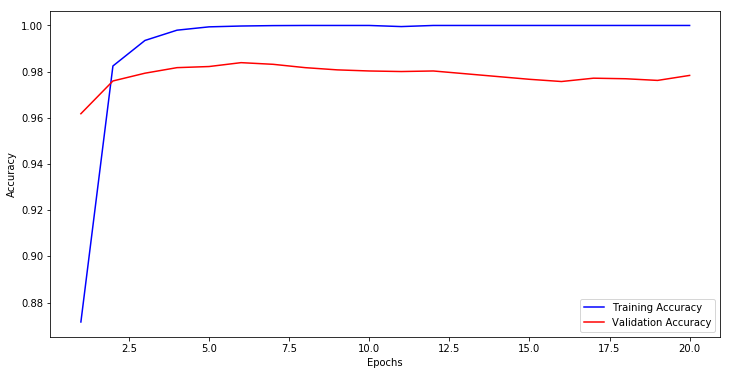

In [50]:
plot_accuracy( history )

#### Train for best Epoch

In [52]:
history_dict = history.history
valid_acc = history_dict['val_acc'] 
best_epoch = valid_acc.index(max(valid_acc)) + 1
best_acc =  max(valid_acc)
print('Best Validation Accuracy Score {}, is for epoch {}'.format( best_acc, best_epoch))

Best Validation Accuracy Score 0.9838942307692308, is for epoch 6


In [54]:
model = get_dnn_model()
history = model.fit( X_train,
                      y_train,
                     epochs = best_epoch,
                     batch_size = 512,
                     validation_data = (X_valid, y_valid)                     
                    )

Train on 16640 samples, validate on 4160 samples
Epoch 1/6
16640/16640 [==============================] - 6s 382us/step - loss: 0.3658 - acc: 0.8746 - val_loss: 0.2375 - val_acc: 0.9394
Epoch 2/6
16640/16640 [==============================] - 6s 344us/step - loss: 0.1302 - acc: 0.9844 - val_loss: 0.1380 - val_acc: 0.9637
Epoch 3/6
16640/16640 [==============================] - 6s 340us/step - loss: 0.0590 - acc: 0.9950 - val_loss: 0.0811 - val_acc: 0.9827
Epoch 4/6
16640/16640 [==============================] - 6s 335us/step - loss: 0.0256 - acc: 0.9991 - val_loss: 0.0832 - val_acc: 0.9724
Epoch 5/6
16640/16640 [==============================] - 6s 333us/step - loss: 0.0188 - acc: 0.9978 - val_loss: 0.0611 - val_acc: 0.9798
Epoch 6/6
16640/16640 [==============================] - 6s 333us/step - loss: 0.0071 - acc: 0.9999 - val_loss: 0.0603 - val_acc: 0.9829


### Predict on test Set
On Kaggle test set the model achieved accuracy of 98%

In [57]:
y_pred = model.predict_classes(X_test)
test_pred = pd.DataFrame(y_pred, columns= ['label'])
test_pred['id'] = test['id']
test_pred.to_csv('dnn_preds.csv', index = False)